## Projeto 1 - Análise exploratória de dados (ENEM 2019)

A análise exploratória de dados (EDA) é usada para analisar e investigar conjuntos de dados e resumir suas principais características, muitas vezes usando métodos de visualização de dados. Ela permite determinar a melhor forma de controlar as fontes de dados para obter as respostas que precisamos, facilitando o reconhecimento de padrões, detecção de anomalias, testar uma hipótese ou verificar suposições.

Nesse projeto, guiado pelo Leon (Let's Data), analisaremos uma base de dados do ENEM 2019. O objetivo dessa análise é entender principalmente as notas dos canditados inscritos no exame. Porém, também será investigado se outras características possuem ligação com as notas. O sexo do candidato influencia em sua nota? A sua renda, gênero ou raça pode influenciar seu desempenho?

Lhe desejo uma boa leitura! Críticas ou sugestões serão sempre bem vindas.

### Dicionário de dados

No dataset utilizado nesse projeto, serão apresentadas diversas informações. Abaixo temos um dicionário de dados, que trará informações de algumas variáveis utilizadas nesse notebook.

**TP_SEXO** - Sexo \
**TP_ESTADO_CIVIL** - Estado Civil \
**TP_COR_RACA** - Cor/raça \
**TP_ESCOLA** - Tipo de escola do Ensino Médio \
**IN_TREINEIRO** - Indica se o inscrito fez a prova com intuito de apenas treinar seus conhecimentos \

In [1]:
# Importando as bibliotecas necessárias para realização do projeto.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
# Configurando o pandas para mostrar todas as colunas e linhas

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Configurando o pandas para não mostrar notação científica para números

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
# Leitura do dataset e visualização das primeiras linhas

df = pd.read_parquet('enem_2019_amostra_10.parquet', engine='pyarrow').reset_index(drop=True)
df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190005708034,2019,2305506,Iguatu,23,CE,22.00,F,1,3,1,2305506.00,Iguatu,23.00,CE,1,3,1,1.00,0,NaN,NaN,None,NaN,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2305506,Iguatu,23,CE,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,1,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,D,B,4,B,A,B,C,A,B,B,A,A,A,A,A,A,B,B,A,B,A,B,B
1,190003326900,2019,3548500,Santos,35,SP,19.00,F,1,1,1,3548500.00,Santos,35.00,SP,1,1,1,1.00,0,NaN,NaN,None,NaN,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3548500,Santos,35,SP,1,1,1,1,503.00,508.00,512.00,515.00,543.90,527.70,545.30,513.90,ACDDCEDEDCCBCBBBBAACECADABAEBBDEEACCECBBCBDDC,ACAABDBEEAABDCCAACBEEDCBDEDBBCCCBCEBDDCABCCBB,BBEEA99999DEEBECBBCACDEAABEEBBECEBAAEDCBECADCE...,EBBADECCAEBBCDECCAEBCABDBCDEBBADBDCABAEBDCCEC,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.00,140.00,140.00,140.00,120.00,140.00,680.00,E,E,B,B,4,I,A,B,C,A,A,B,B,B,A,B,A,A,B,A,B,E,B,B,B
2,190004261548,2019,3552106,Socorro,35,SP,16.00,F,1,1,1,3552106.00,Socorro,35.00,SP,3,0,1,NaN,1,NaN,NaN,None,NaN,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3552106,Socorro,35,SP,1,1,1,1,504.00,509.00,514.00,516.00,406.10,521.20,549.20,510.50,ADCAEDAEADACDCBACEDEABCEBBAEBABBACEEDEACAABCD,ADACCCACDBAABBBDBAEABCCEACAABDEBAECAEDAEDAACE,99999ABCABBAEBCDEDEBDAADCEDCDECBDBDBBECAEDCCBC...,BECACAABACBCABCACDACBDCCDACAAEBCECAECEBCAECEE,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.00,120.00,120.00,120.00,120.00,0.00,480.00,F,F,B,D,4,I,A,C,D,B,A,B,A,B,A,B,A,B,C,A,A,E,A,B,B
3,190001849598,2019,3541000,Praia Grande,35,SP,22.00,M,1,1,1,3541000.00,Praia Grande,35.00,SP,1,5,1,1.00,0,NaN,NaN,None,NaN,None,NaN,NaN,NaN,0,0

In [4]:
# Coletando informações do dataset

print(f'O número de registros nesse dataset é {df.shape[0]}, já a quantidade de colunas é {df.shape[1]}.')

O número de registros nesse dataset é 509527, já a quantidade de colunas é 136.


In [5]:
# Cria uma lista com todas as variáveis que começam com 'TX_'
colunas_questoes = [coluna for coluna in df.columns if coluna.startswith('TX_')]

# Cria uma lista com todas as variáveis que começam com 'CO_'
colunas_codigos = [coluna for coluna in df.columns if coluna.startswith('CO_')]

#Cria uma lista com todas as variáveis que começam com 'MUNICIPIO'
colunas_municipio = [coluna for coluna in df.columns if 'MUNICIPIO' in coluna]

# Unifica todas as listas que serão descartadas
descartar_colunas = colunas_questoes + colunas_codigos + colunas_municipio + ['NU_INSCRICAO', 'NU_ANO']

# Descarta todas as variáveis unificadas acima
df = df.drop(descartar_colunas, axis='columns')

# Verificando o número atual de colunas
print(f'O número de colunas nesse dataset após o "drop" é {df.shape[1]}')

O número de colunas nesse dataset após o "drop" é 109


In [6]:
# Criando uma lista apenas com as variáveis "NOTA"

colunas_notas = [coluna for coluna in df.columns if 'NOTA' in coluna and 'COMP' not in coluna]
colunas_notas

['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

### Análise das notas

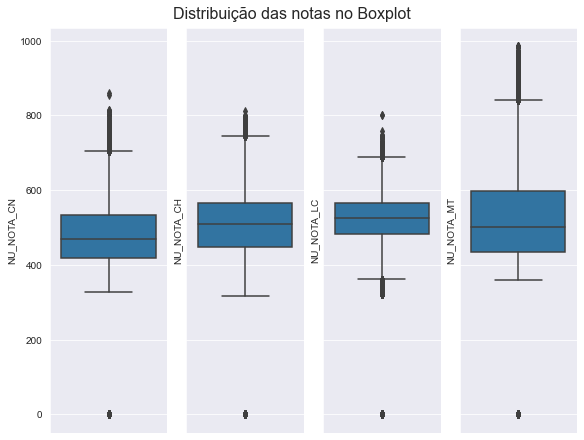

,Descrição
Coluna,
NU_NOTA_CN,Nota da prova de Ciências da Natureza
NU_NOTA_CH,Nota da prova de Ciências Humanas
NU_NOTA_LC,Nota da prova de Linguagens e Códigos
NU_NOTA_MT,Nota da prova de Matemática


In [61]:
# Criando um boxplot para visualizar a distribuição dos dados

sns.set_style('darkgrid')
box_figura, box_graficos = plt.subplots(1, 4, sharey=True, figsize=(8, 6), layout='constrained')
box_figura.suptitle('Distribuição das notas no Boxplot', fontsize=16)


for i in range(4):
    coluna = colunas_notas[i]
    sns.boxplot(data=df, y=coluna, ax=box_graficos[i])

plt.show()
    
notas = pd.DataFrame({'Coluna':['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT'],
                             'Descrição':['Nota da prova de Ciências da Natureza',
                                          'Nota da prova de Ciências Humanas',
                                          'Nota da prova de Linguagens e Códigos',
                                          'Nota da prova de Matemática']}).set_index('Coluna')
notas

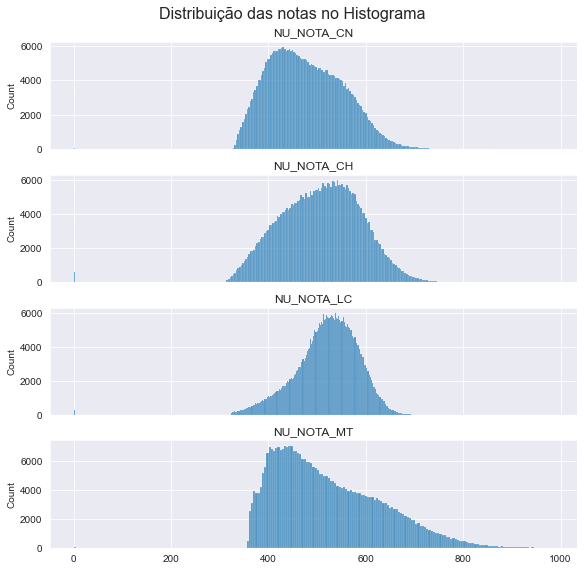

,Descrição
Coluna,
NU_NOTA_CN,Nota da prova de Ciências da Natureza
NU_NOTA_CH,Nota da prova de Ciências Humanas
NU_NOTA_LC,Nota da prova de Linguagens e Códigos
NU_NOTA_MT,Nota da prova de Matemática


In [60]:
# Criando um histograma para visualizar a distribuição dos dados

sns.set_style('darkgrid')
hist_figuras, hist_graficos = plt.subplots(4, 1, sharex=True, figsize=(8, 8), layout='constrained')
hist_figuras.suptitle('Distribuição das notas no Histograma', fontsize=16)
plt.xlabel(' ')

for i in range(4):
    coluna = colunas_notas[i]
    sns.histplot(data=df[coluna], ax=hist_graficos[i]).set_title(coluna)

plt.show()
    
notas = pd.DataFrame({'Coluna':['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT'],
                             'Descrição':['Nota da prova de Ciências da Natureza',
                                          'Nota da prova de Ciências Humanas',
                                          'Nota da prova de Linguagens e Códigos',
                                          'Nota da prova de Matemática']}).set_index('Coluna')
notas

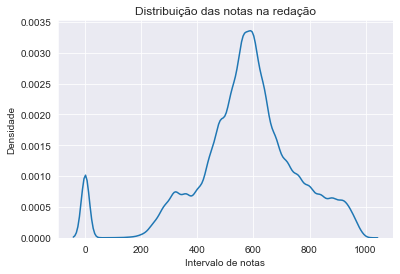

In [9]:
# Analisando a nota da redação

sns.kdeplot(data=df['NU_NOTA_REDACAO']).set_title('Distribuição das notas na redação')
plt.xlabel('Intervalo de notas')
plt.ylabel('Densidade')
plt.show()

### Análise dos participantes

In [63]:
# Verificando o "padrão" de participante, através da moda dos valores.

df[['NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ESCOLA']].mode()

,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA
0,18.00,F,1,3,1,1


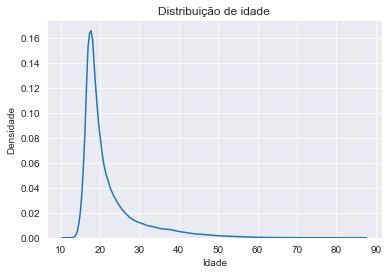

In [10]:
# Analisando a distribuição da idade

sns.kdeplot(data=df['NU_IDADE']).set_title('Distribuição de idade')
plt.xlabel('Idade')
plt.ylabel('Densidade')
plt.show()

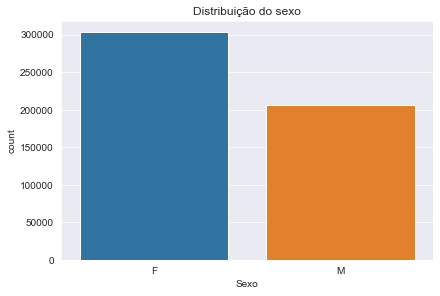

In [11]:
# Verificando distribuição do sexo
count_figure, count_graficos = plt.subplots(layout='constrained', figsize=(6, 4))
sns.countplot(data=df, x='TP_SEXO',).set_title('Distribuição do sexo')
plt.xlabel('Sexo')
plt.show()

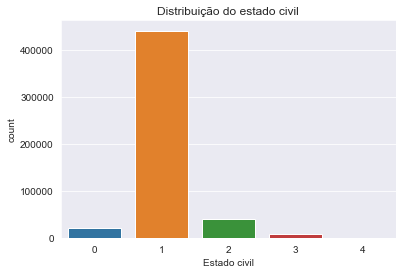

,Descrição
Código,
0,Não informado
1,Solteiro(a)
2,Casado(a)/Mora com companheiro(a)
3,Divorciado(a)/Desquitado(a)/Separado(a)
4,Viúvo(a)


In [12]:
# Verificando distribuição do estado civil
sns.countplot(data=df, x='TP_ESTADO_CIVIL',).set_title('Distribuição do estado civil')
plt.xlabel('Estado civil')
plt.show()

# Criação de um dataframe para facilitar a identificação das categorias
estado_civil = pd.DataFrame({'Código':[0,1,2,3,4],
                             'Descrição':['Não informado',
                                          'Solteiro(a)',
                                          'Casado(a)/Mora com companheiro(a)',
                                          'Divorciado(a)/Desquitado(a)/Separado(a)',
                                          'Viúvo(a)']}).set_index('Código')
estado_civil

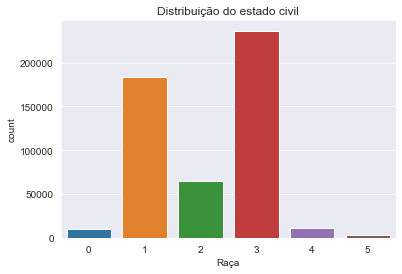

,Descrição
Código,
0,Não declarado
1,Branca
2,Preta
3,Parda
4,Amarela
5,Indígena


In [13]:
# Verificando distribuição de raças
sns.countplot(data=df, x='TP_COR_RACA',).set_title('Distribuição do estado civil')
plt.xlabel('Raça')
plt.show()

# Criação de um dataframe para facilitar a identificação das categorias
estado_civil = pd.DataFrame({'Código':[0,1,2,3,4,5],
                             'Descrição':['Não declarado',
                                          'Branca',
                                          'Preta',
                                          'Parda',
                                          'Amarela',
                                          'Indígena']}).set_index('Código')
estado_civil

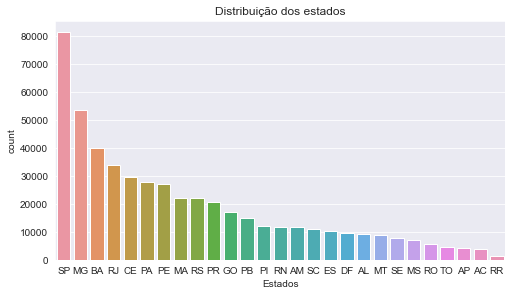

In [14]:
# Verificando distribuição de raças

sns.set_style('darkgrid')
estados_figure, estados_graficos = plt.subplots(layout='constrained', figsize=(7, 4))
sns.countplot(data=df, x='SG_UF_RESIDENCIA', order = df['SG_UF_RESIDENCIA'].value_counts().index).set_title('Distribuição dos estados')
plt.xlabel('Estados')
plt.show()

In [15]:
# Por se tratar de uma variável categórica ordinal, iremos atribuir valores numéricos.

# Criando um dicionário para que seja feita a atribuição.
dicionario_renda = {}

for i, letter in enumerate(df['Q006'].sort_values().unique()):
    if i == 17:
        break
    dicionario_renda[letter] = i
    
# Criando uma nova variável
df['renda_familiar'] = df['Q006'].map(dicionario_renda)

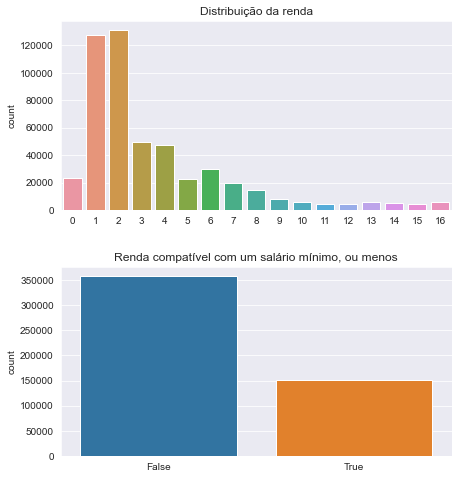

In [16]:
# Verificando quantos candidatos possuem renda familiar próxima à de um salário mínimo (R$ 998,00), 2019.

# Criando uma variável que ilustra pessoas com salário salário minimo, ou menos.
df['salario_minimo'] = df['renda_familiar'].isin([0, 1])



salario_figure, salario_graficos = plt.subplots(2, figsize=(7, 8))
sns.countplot(data=df, x='renda_familiar', ax=salario_graficos[0]).set_title('Distribuição da renda')
sns.countplot(data=df, x='salario_minimo', ax=salario_graficos[1]).set_title('Renda compatível com um salário mínimo, ou menos')
salario_graficos[0].set_xlabel('')
salario_graficos[1].set_xlabel('')
plt.subplots_adjust(hspace=0.3)
plt.show()

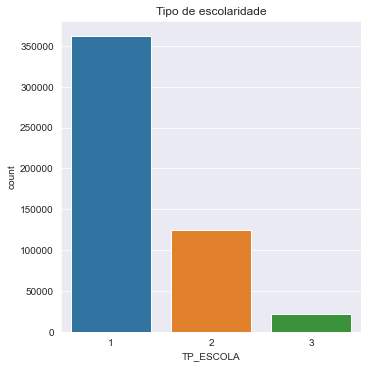

,Descrição
Código,
1,Não Respondeu
2,Pública
3,Privada
4,Exterior


In [17]:
# Verificando o tipo de escola que os candidatos concluíram ou vão concluir
plt.subplots(layout='constrained', figsize=(5,5))
sns.countplot(data=df, x='TP_ESCOLA').set_title('Tipo de escolaridade')
plt.show()

# Criação de um dataframe para facilitar a identificação das categorias
escola_em = pd.DataFrame({'Código':[1,2,3,4],
                             'Descrição':['Não Respondeu',
                                          'Pública',
                                          'Privada',
                                          'Exterior']}).set_index('Código')
escola_em

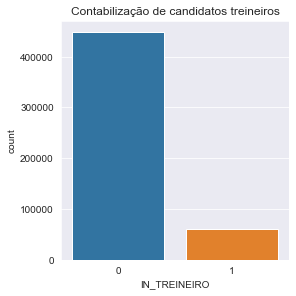

In [51]:
# Verificando a quantidade de candidatos treineiros.

plt.subplots(layout='constrained', figsize=(4,4))
sns.countplot(data=df, x='IN_TREINEIRO').set_title('Contabilização de candidatos treineiros')
plt.show()

### Relacionando as notas com as características dos participantes

In [96]:
#Criando um dataframe apenas com informações das notas e sexo dos participantes
df_notas_sexo = df.loc[:, colunas_notas + ['TP_SEXO']]

dicionario_sexo = {'M':1, 'F':0}
df_notas_sexo['TP_SEXO'] = df_notas_sexo['TP_SEXO'].map(dicionario_sexo)

#Criando um dataframe apenas com informações das notas e sexo dos participantes
df_notas_raca = df.loc[:, colunas_notas + ['TP_COR_RACA']]

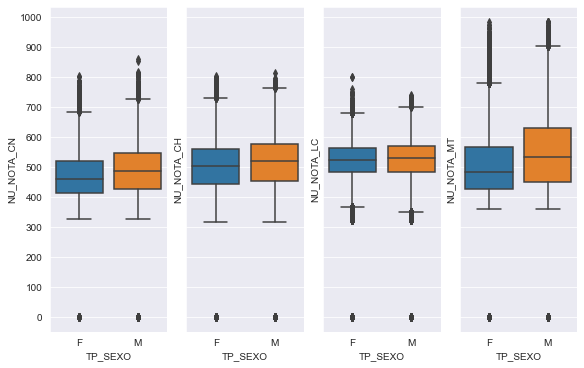

In [39]:
fig, ax = plt.subplots(1, 4, sharey=True, layout='constrained', figsize=(8, 5))

for i in range(4):
    sns.boxplot(data=df_notas_sexo, x='TP_SEXO', y=colunas_notas[i], ax=ax[i]).set_yticks(range(0, 1100, 100))

,Descrição
Código,
0,Não declarado
1,Branca
2,Preta
3,Parda
4,Amarela
5,Indígena


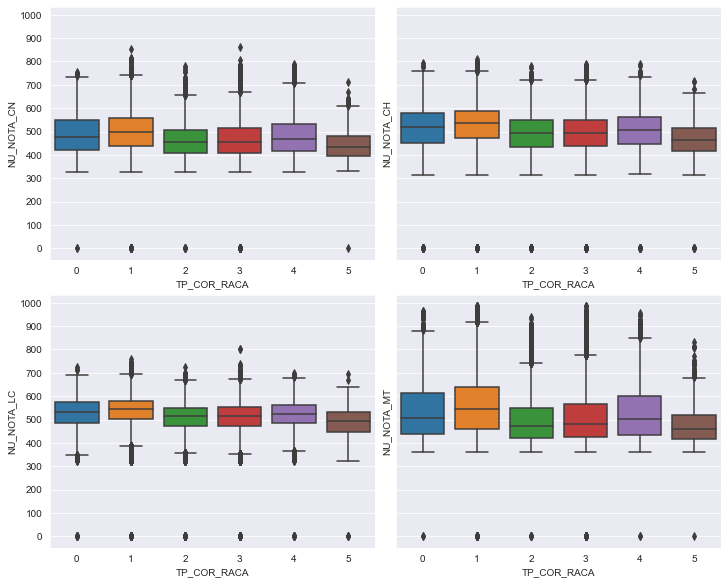

In [20]:
fig, ax = plt.subplots(2, 2, sharey=True, layout='constrained', figsize=(10, 8))

for i in range(2):
    coluna1 = colunas_notas[i*2]
    coluna2 = colunas_notas[i*2+1]
    sns.boxplot(data=df_notas_raca, x='TP_COR_RACA', y=coluna1, ax=ax[i][0]).set_yticks(range(0, 1100, 100))
    sns.boxplot(data=df_notas_raca, x='TP_COR_RACA', y=coluna2, ax=ax[i][1]).set_yticks(range(0, 1100, 100))

# Criação de um dataframe para facilitar a identificação das categorias
estado_civil = pd.DataFrame({'Código':[0,1,2,3,4,5],
                             'Descrição':['Não declarado',
                                          'Branca',
                                          'Preta',
                                          'Parda',
                                          'Amarela',
                                          'Indígena']}).set_index('Código')
estado_civil

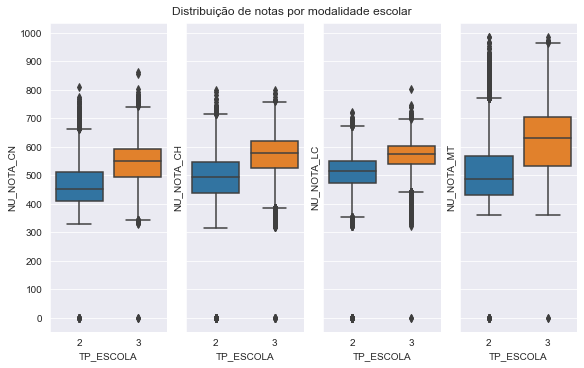

In [70]:
# Criando uma váriavel que só traz candidatos de escola pública e privada
df_escolas = df.loc[(df['TP_ESCOLA'] == 2) | (df['TP_ESCOLA'] == 3)][colunas_notas + ['TP_ESCOLA']]


# Analisando as notas de candidatos que vieram de escola pública e privada
fig, ax = plt.subplots(1, 4, sharey=True, layout='constrained', figsize=(8,5))
plt.suptitle('Distribuição de notas por modalidade escolar')

for i in range(4):
    sns.boxplot(data=df_escolas, x='TP_ESCOLA', y=colunas_notas[i], ax=ax[i]).set_yticks(range(0, 1100, 100))
    
plt.show()

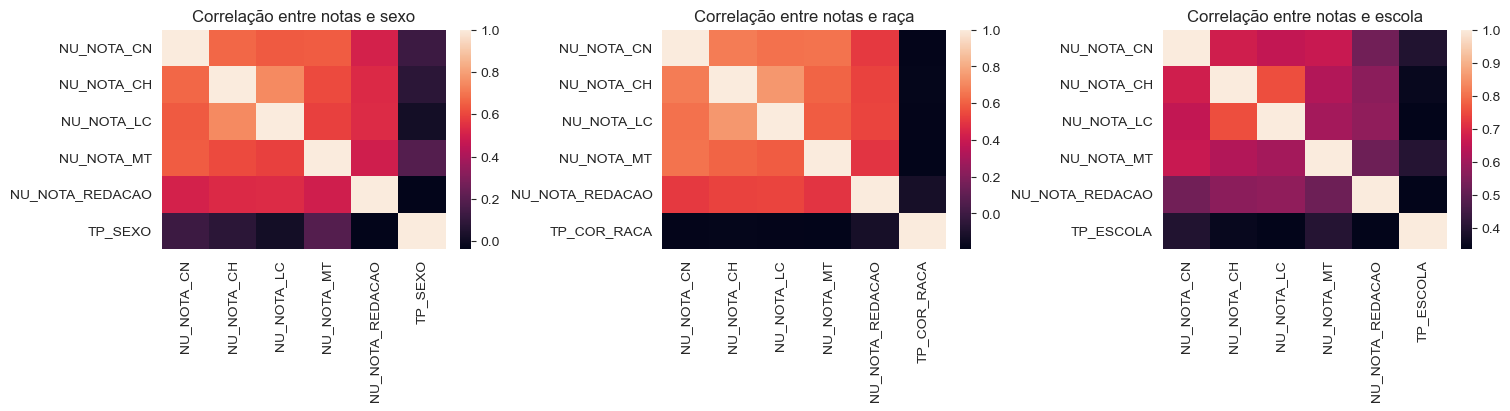

In [98]:
# Verificando correlações

fig, ax = plt.subplots(1, 3, layout='constrained', figsize=(15, 4), dpi=100)

sns.heatmap(df_notas_sexo.corr(), ax=ax[0]).set_title('Correlação entre notas e sexo')
sns.heatmap(df_notas_raca.corr(), ax=ax[1]).set_title('Correlação entre notas e raça')
sns.heatmap(df_escolas.corr(), ax=ax[2]).set_title('Correlação entre notas e escola')

plt.show()    

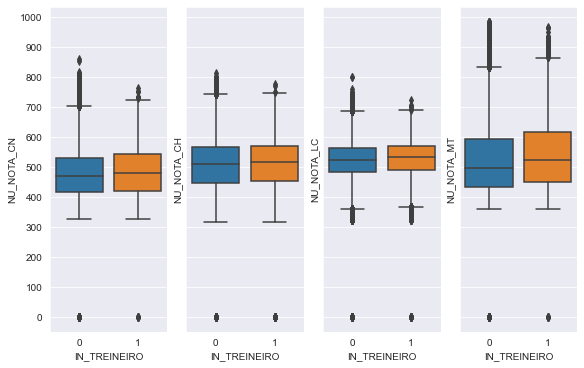

In [93]:
##### Analisando as notas de candidatos que se consideram "treineiros"
fig, ax = plt.subplots(1, 4, sharey=True, layout='constrained', figsize=(8,5))

for i in range(4):
    sns.boxplot(data=df, x='IN_TREINEIRO', y=colunas_notas[i], ax=ax[i]).set_yticks(range(0, 1100, 100))

plt.show()